<a href="https://colab.research.google.com/github/marikaitiprim/ConvexHull-ComputationalGeometry/blob/main/FinalComGeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMPUTATIONAL GEOMETRY**

---




ΠΡΙΜΕΝΤΑ ΑΙΚΑΤΕΡΙΝΗ-ΜΑΡΙΑ\
sdi1900160

#**Υλοποίηση 1: Κυρτό περίβλημα.**


1) Αυξητικός αλγόριθμος.

In [ ]:
import numpy as np

def orientation(p1,p2,p3):
  if((p2[0]*p3[1])-(p2[1]*p3[0])-(p1[0]*p3[1])+(p1[1]*p3[0])+(p1[0]*p2[1])-(p1[1]*p2[0])) < 0:    #right orientation
    return True
  return False

def incremental(P):
  P.sort()                                                                                  #sort set by x
  Lup = [P[0],P[1]]                                                                         #initialize L upper
  for i in range(2,len(P)):
    Lup.append(P[i])
    while(len(Lup) > 2 and not orientation(Lup[len(Lup)-3],Lup[len(Lup)-2],Lup[len(Lup)-1])):   #lup has more than 2 elements and the 3 last points are not clockwise oriented
      Lup.pop(len(Lup)-2)                                                                     #remove 2nd from end point
  Llow  = [P[len(P)-1],P[len(P)-2]]                                                             #initialize L lower
  for i in range(len(P)-3,-1,-1):
    Llow.append(P[i])
    while(len(Llow) > 2 and not orientation(Llow[len(Llow)-3],Llow[len(Llow)-2],Llow[len(Llow)-1])):   #llow has more than 2 elements and the 3 last points are not clockwise oriented
      Llow.pop(len(Llow)-2)                                                                   #remove 2nd from end point
  Llow.pop(0)                                                                                   #remove first and last point from llow
  Llow.pop(len(Llow)-1)
  L = Lup + Llow
  return np.array(L)

Αλγόριθμος Περιτυλίγματος.

In [ ]:
def collinear(p1,p2,p3):
  if((p3[1] - p2[1])*(p2[0] - p1[0]) == (p2[1] - p1[1])*(p3[0] - p2[0])):
    return True
  return False


def giftwrapping(S):
  S = sorted(S, key=lambda k: [k[0],k[1]])        #sort S with the smallest x
  r0 = S[0]                                       #initialize r0
  r = r0                                          #initialize current r
  P = []                                          #chain of points
  while True:
    P.append(r)                                   #current point in chain
    u = S[0]                                      #begin with r0 point as u
    for j in range(1,len(S)):
      t = S[j]                                      #point t in S
      if(orientation(r,u,t) or collinear(r,u,t)):   #check cw orientation and collinearity
        u = t
    if(u == r0):                                    #end point is the starting point
      break
    r = u
    S.remove(r)                                    #remove visisted point r
  return np.array(P)

Αλγόριθμος Διαίρει και Βασίλευε.

In [ ]:
import math

def divideConquer(P):
  P.sort()                            #sort by x
  if(len(P) <= 2):                    #very few points
    return P
  alen = math.ceil(len(P)/2)
  blen = math.floor(len(P)/2)
  a = P[0:alen]                       #divide into 2 subsets
  b = P[alen:len(P)]
  ahull = divideConquer(a)            #find convex hull of the 2 subsets recursively
  bhull = divideConquer(b)
  return merge(ahull,bhull)           #merge convex hulls

def merge(ahull, bhull):
  rightmosta = max(ahull)             #find rightmost point of a
  leftmostb = min(bhull)              #find leftmost point of b
  uppera, upperb, lowera, lowerb = intersection(ahull, bhull, rightmosta, leftmostb)
  mergedch = []                       #merged polygon
  ai = uppera
  mergedch.append(ahull[uppera])      #begin with upper point of hull A
  while ai!=lowera:                   #append all the points between upper and lower point of A - counterclockwise orientation
    ai = (ai + 1)%len(ahull)          #attention to limits
    mergedch.append(ahull[ai])

  bj = lowerb
  mergedch.append(bhull[lowerb])      #connect the half of convex hull A with the lowest point of B
  while bj!=upperb:                   #append all the points between lower and upper point of B - counterclockwise orientation
    bj = (bj + 1)%len(bhull)          #attention to limits
    mergedch.append(bhull[bj])

  return mergedch



def intersection(ahull, bhull, rightmosta, leftmostb):
  ai = ahull.index(rightmosta)        #find Ai
  bj = bhull.index(leftmostb)         #find Bj

  ai1 = ai
  bj1 = bj
  flag = 1
  while flag:
    flag = 0
    ai2 = (ai1 + 1) % len(ahull)                    #Ai+1 - attention not getting out of limits
    while(orientation(ahull[ai1],ahull[ai2],bhull[bj1]) and not collinear(ahull[ai1],ahull[ai2],bhull[bj1])):     #clockwise Ai Ai+1 Bj - case for collinearity
      ai1 = (ai1 + 1) % len(ahull)              #increase i
      ai2 = (ai1 + 1) % len(ahull)
      flag = 1                                    #i changed

    bj2 = (bj1 - 1 + len(bhull))%len(bhull)        #Bj-1
    while(orientation(bhull[bj2],bhull[bj1],ahull[ai1]) and not collinear(bhull[bj2],bhull[bj1],ahull[ai1])):     #clockwise Bj-1 Bj Ai case for collinearity
      bj1 = (bj1 - 1 + len(bhull))%len(bhull)
      bj2 = (bj1 - 1 + len(bhull))%len(bhull)
      flag = 1                                    #j changed

  uppera = ai1                          #upper bridge AiBj
  upperb = bj1

  ai1 = ai
  bj1 = bj
  flag = 1
  while flag:
    flag = 0
    bj2 = (bj1 + 1) % len(bhull)                    #Bi+1 - attention not getting out of limits
    while(orientation(bhull[bj1],bhull[bj2],ahull[ai1]) and not collinear(bhull[bj1],bhull[bj2],ahull[ai1])):     #clockwise Bj Bj+1 Ai
      bj1 = (bj1 + 1) % len(bhull)              #increase j
      bj2 = (bj1 + 1) % len(bhull)
      flag = 1                                    #j changed

    ai2 = (ai1 - 1 + len(ahull))%len(ahull)        #Aj-1
    while(orientation(ahull[ai2],ahull[ai1],bhull[bj1]) and not collinear(ahull[ai2],ahull[ai1],bhull[bj1])):     #clockwise Ai-1 Ai Bj
      ai1 = (ai1 - 1 + len(ahull))%len(ahull)
      ai2 = (ai1 - 1 + len(ahull))%len(ahull)
      flag = 1                                    #i changed

  lowera = ai1                          #lower bridge AiBj
  lowerb = bj1

  return uppera, upperb, lowera, lowerb

Αλγόριθμος QuickHull.

In [ ]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def quickhull(P):
  return ConvexHull(P)

2) *Αυξητικός αλγόριθμος:* Πολυπλοκότητα Ο(nlogn) στη μέση και στη χειρότερη περίπτωση, όπου τα σημεία είναι ομοιόμορφα κατανεμημένα. Εκφυλισμένες περιπτώσεις όπου όλα τα σημεία αποτελούν κορυφές του κυρτού περιβλήματος (πχ. να βρίσκονται σε περιφέρεια κύκλου), δίνουν πολυπλοκότητα Ο(n^2). Άλλες τέτοιες περιπτώσεις είναι αυτές που τα n-1 σημεία βρίσκονται στην ακμή την οποία ορίζουν το αριστερότερο και το δεξιότερο σημείο, όπου η πολυπλοκότητα γίνεται γραμμιική O(n).\
*Αλγόριθμος περιτυλίγματος (Jarvis):* Πολυπλοκότητα Ο(nH), όπου H το πλήθος κορυφών στο κυρτό περίβλημα. Η συμπεριφορά του αλγορίθμου εξαρτάται από το πλήθος των κορυφών τους περιβλήματος. Ένα άνω φράγμα για την πολυπλοκότητα ως προς το μέγεθος της εισόδου είναι Ο(n^2), που αποτελεί και τη χειρότερη περίπτωση. Για μικρό πλήθος κορυφών γίνεται Ο(n).\
*Αλγόριθμος Διαίρει και Βασίλευε:* Πολυπλοκότητα Ο(nlogn).\
*Αλγόριθμος QuickHull:* Πολυπλοκότητα Ο(nlogn) εαν τα σημεία είναι κατανεμημένα τυχαία, αλλιώς Ο(n^2).






3) QuickHull σε 3 διαστάσεις.

In [ ]:
def quickhull3d(P):
  return ConvexHull(P)

#**Εφαρμογή 1:**

1) Ορίζουμε 80 τυχαία σημεία στο επίπεδο και θεωρούμε ότι παίρνουν πραγματικές τιμές από 0 μέχρι 200:

In [ ]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(80)]
Par = np.array(P)
print("List of points:")
print(Par)

List of points:
[[197.36768696  20.84224161]
 [ 13.41564744 125.79239819]
 [  0.71206474  41.99650829]
 [ 27.1770298   28.16417562]
 [152.65505546  19.8070234 ]
 [ 22.96463422 121.36793939]
 [ 51.44981851 181.90144135]
 [105.97731192  37.6227098 ]
 [138.81878194 151.33969729]
 [177.33815834 178.63317798]
 [ 12.52012845 188.88110332]
 [149.97359643  16.55033132]
 [ 84.16544647   9.50198423]
 [ 71.20057575 121.07445269]
 [102.46322814  24.61360789]
 [108.42284702  99.53534329]
 [ 40.8511507  192.8400629 ]
 [160.95234307 150.27660005]
 [ 91.57925732 196.21642879]
 [185.36009696  16.4919229 ]
 [ 22.28707472  39.37788355]
 [ 61.00837725   0.5733178 ]
 [141.97451695 163.35269561]
 [ 31.75051383 165.96200496]
 [ 67.83837323 185.58343074]
 [ 86.76711701  41.1307875 ]
 [ 16.03287321  32.71788517]
 [179.04002142 143.78734704]
 [100.07019393  51.19128085]
 [ 26.94130336 178.46561796]
 [ 69.72798514   5.86118883]
 [ 78.97152231 132.39638826]
 [199.37273212 169.32928817]
 [ 40.33393879 199.94483421

α) Αυξητικός αλγόριθμος.

Points of convex hull:
[[ 0.61428758  1.80859154]
 [ 0.72923436 11.79127189]
 [ 7.02274127 17.05963845]
 [14.49528879 18.00803739]
 [18.50551945 15.04516379]
 [15.69706231  8.90703078]
 [13.33736414  5.8268438 ]
 [ 6.33265732  0.66345039]]


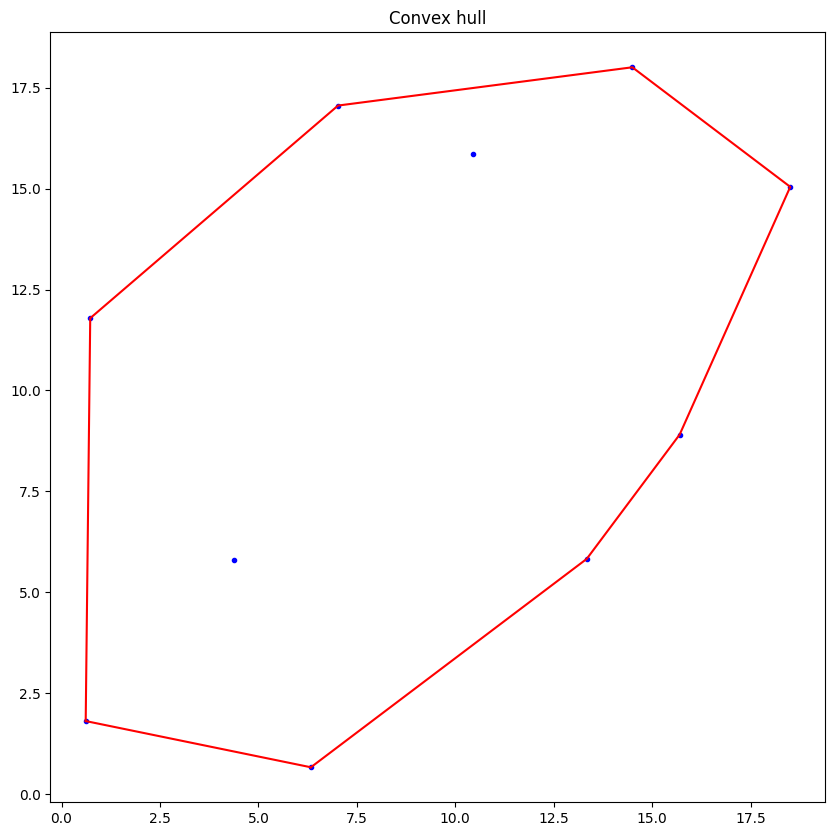

In [ ]:
import matplotlib.pyplot as plt
import copy

def plot2D(Par,L):
  plt.figure(figsize=(10,10))
  x = Par[:,0]        #x coordinate for P
  y = Par[:,1]        #y coordinate for P
  plt.plot(x,y,'.b')  #plot all the points
  x = L[:,0]
  y = L[:,1]
  plt.plot(x,y,'r-')      #plot points of convex hull using coordinates x and y   
  xlast = [L[len(x)-1,0],L[0,0]]
  ylast = [L[len(x)-1,1],L[0,1]]
  plt.plot(xlast, ylast, 'r-')    #plot last vertex
  plt.title("Convex hull") 
  plt.show()


Pinc = copy.deepcopy(P)       #safe method to ensure that P will not change
Pincar = np.array(Pinc)
L = incremental(Pinc)
print("Points of convex hull:")
print(L)
plot2D(Pincar,L)

Αλγόριθμος περιτυλίγματος.

Points of convex hull:
[[  0.6023189  192.37865284]
 [  0.71206474  41.99650829]
 [ 27.24369238  13.72432581]
 [ 61.00837725   0.5733178 ]
 [135.674486     3.326308  ]
 [173.54697397  11.42451312]
 [181.9303958   13.87818346]
 [197.36768696  20.84224161]
 [199.37273212 169.32928817]
 [193.72053023 197.04597825]
 [ 40.33393879 199.94483421]
 [  1.99402856 195.19510385]]


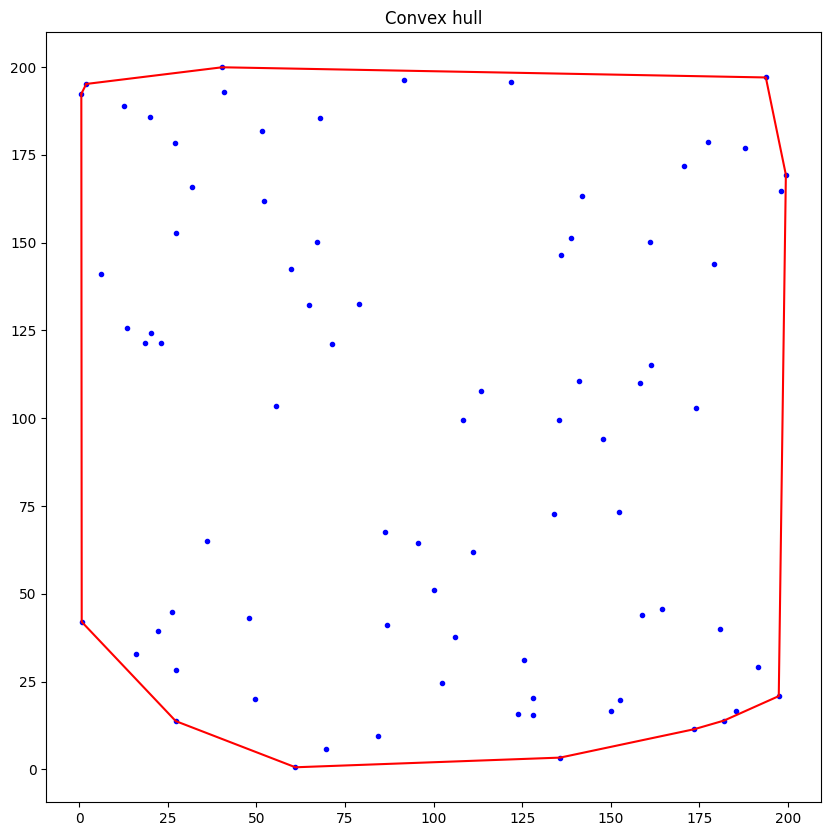

In [ ]:
Pgw = copy.deepcopy(P)
Pgwar = np.array(Pgw)
L = giftwrapping(Pgw)
print("Points of convex hull:")
print(L)
plot2D(Pgwar,L)

Αλγόριθμος Διαίρει και Βασίλευε.

Points of convex hull:
[[ 40.33393879 199.94483421]
 [  1.99402856 195.19510385]
 [  0.6023189  192.37865284]
 [  0.71206474  41.99650829]
 [ 27.24369238  13.72432581]
 [ 61.00837725   0.5733178 ]
 [135.674486     3.326308  ]
 [173.54697397  11.42451312]
 [181.9303958   13.87818346]
 [197.36768696  20.84224161]
 [199.37273212 169.32928817]
 [193.72053023 197.04597825]]


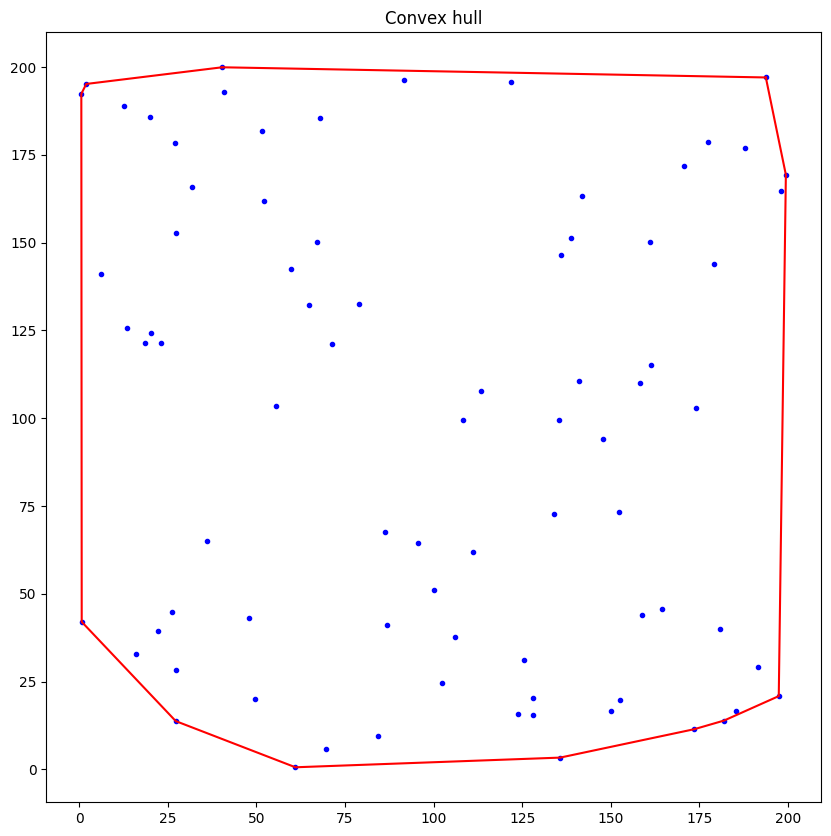

In [ ]:
Pdc = copy.deepcopy(P)
Pdcar = np.array(Pdc)
L = divideConquer(Pdc)
print("Points of convex hull:")
print(np.array(L))
plot2D(Pdcar,np.array(L))

Αλγόριθμος Quickhull (2D).

Points of convex hull:
[[197.36768696  20.84224161]
 [199.37273212 169.32928817]
 [193.72053023 197.04597825]
 [ 40.33393879 199.94483421]
 [  1.99402856 195.19510385]
 [  0.6023189  192.37865284]
 [  0.71206474  41.99650829]
 [ 27.24369238  13.72432581]
 [ 61.00837725   0.5733178 ]
 [135.674486     3.326308  ]
 [173.54697397  11.42451312]
 [181.9303958   13.87818346]]


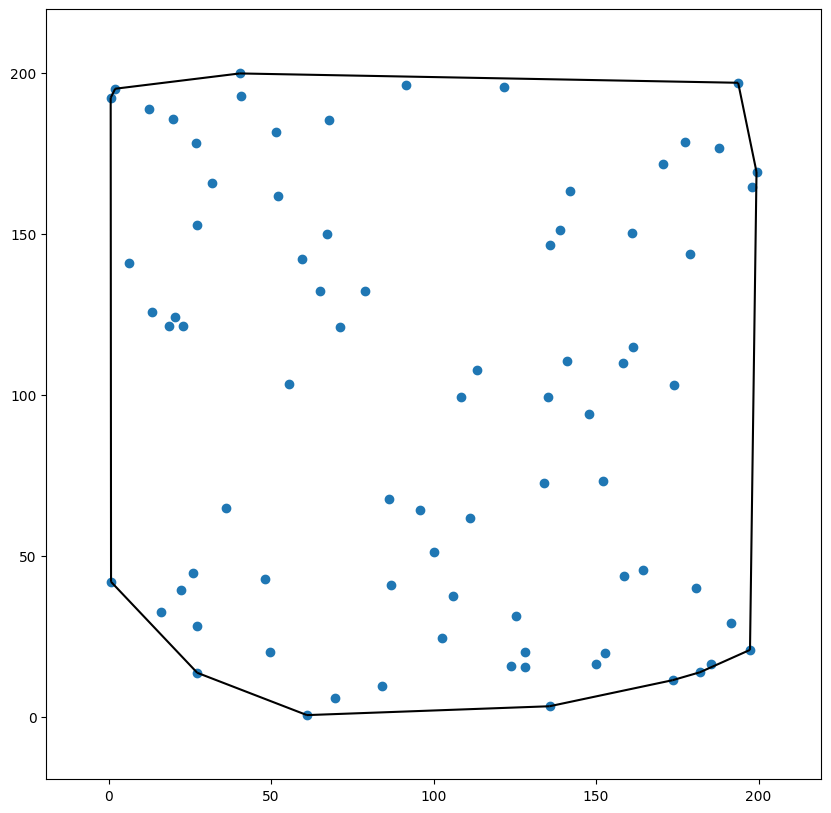

In [ ]:
Pqh = copy.deepcopy(P)
Pqhar = np.array(Pqh)
L = quickhull(Pqh)
print("Points of convex hull:")
print(Pqhar[L.vertices])
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(L,ax)
plt.show()

β) Επιλέγουμε τον αυξητικό αλγόριθμο για την οπτικοποίηση των βημάτων του.

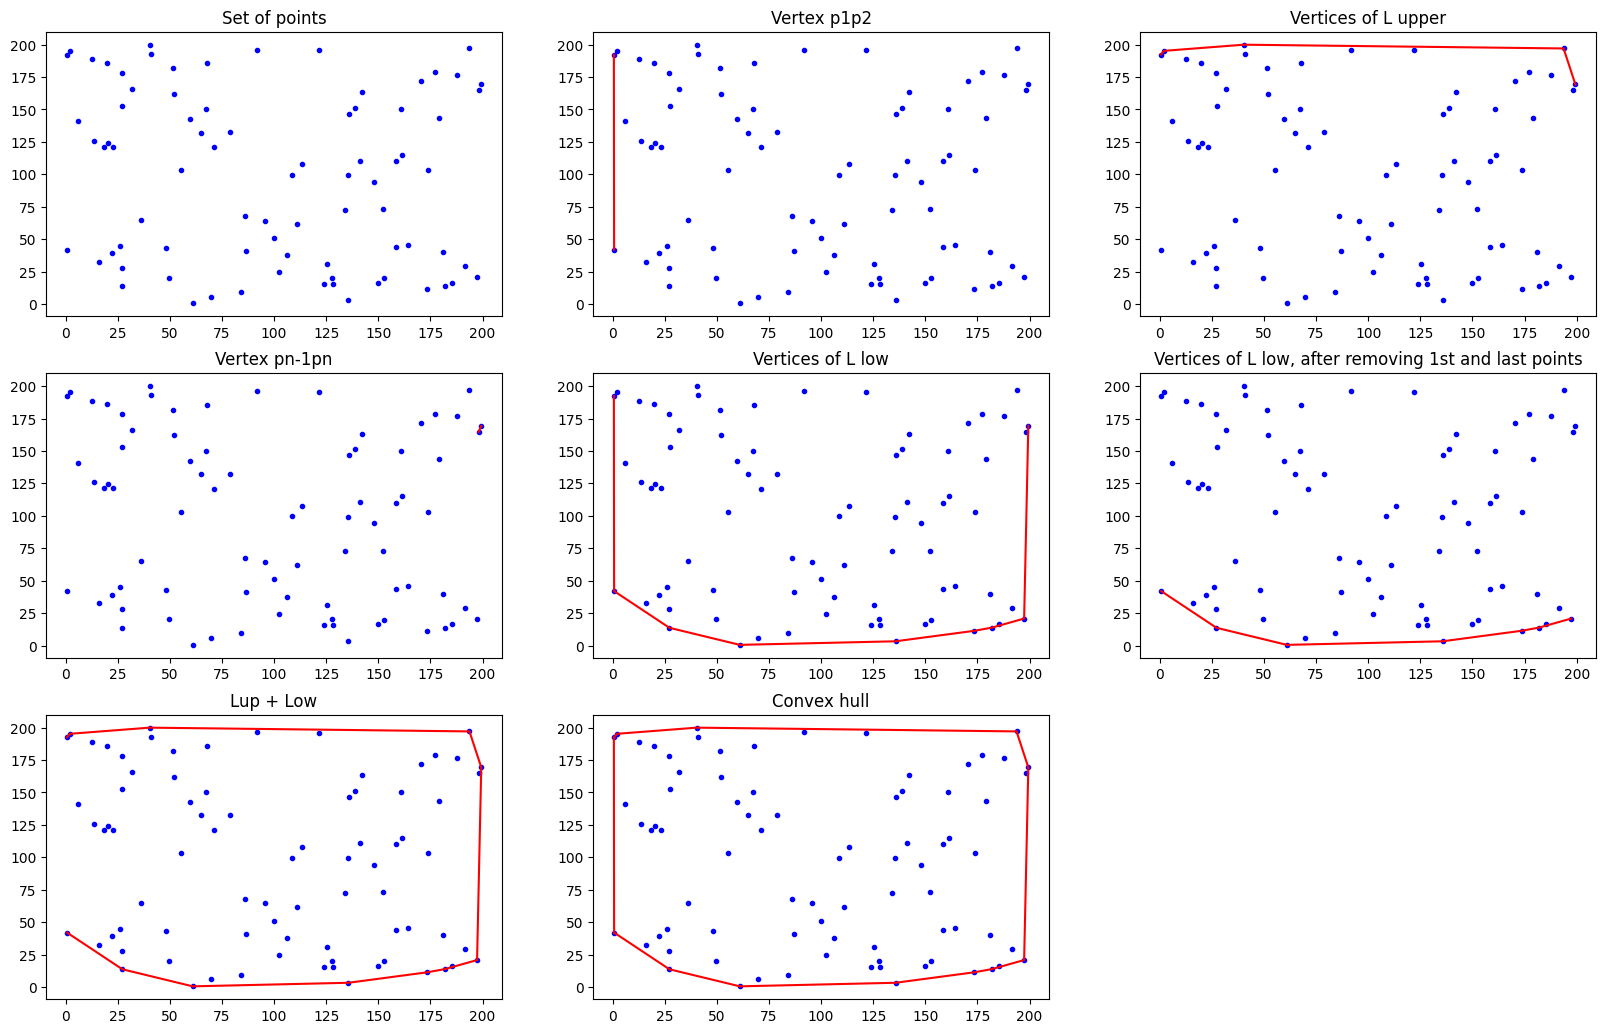

In [ ]:
Pinc.sort()
fig = plt.figure(figsize=(20,17))
ax = fig.add_subplot(431)
Pincar = np.array(Pinc)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.title("Set of points")

ax = fig.add_subplot(432)                                                                              
Lup = [Pinc[0],Pinc[1]]  
Lupar = np.array((list(Pinc[0]),list(Pinc[1])))
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Lupar[:,0],Lupar[:,1],'r-')        #plotting p1 and p2 
plt.title("Vertex p1p2")

for i in range(2,len(Pinc)):
  Lup.append(Pinc[i])
  while(len(Lup) > 2 and not orientation(Lup[len(Lup)-3],Lup[len(Lup)-2],Lup[len(Lup)-1])):   
    Lup.pop(len(Lup)-2)  

ax = fig.add_subplot(433)
j = 0
Lupar = [list(Lup[j]) for j in range(len(Lup))]
Lupar = np.array(Lupar)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Lupar[:,0],Lupar[:,1],'r-')        
plt.title("Vertices of L upper")
  

ax = fig.add_subplot(434)                                                                              
Llow  = [Pinc[len(Pinc)-1],Pinc[len(Pinc)-2]]
Llowar = np.array((list(Pinc[len(Pinc)-1]),list(Pinc[len(Pinc)-2])))
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Llowar[:,0],Llowar[:,1],'r-')        #plotting pn and pn-1 
plt.title("Vertex pn-1pn")     
                                                                                                                 
for i in range(len(Pinc)-3,-1,-1):
  Llow.append(Pinc[i])
  while(len(Llow) > 2 and not orientation(Llow[len(Llow)-3],Llow[len(Llow)-2],Llow[len(Llow)-1])):   
    Llow.pop(len(Llow)-2)   

ax = fig.add_subplot(435)
j = 0
Llowar = [list(Llow[j]) for j in range(len(Llow))]
Llowar = np.array(Llowar)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Llowar[:,0],Llowar[:,1],'r-')       
plt.title("Vertices of L low")
                                                                
Llow.pop(0)                                                                                   
Llow.pop(len(Llow)-1)     

ax = fig.add_subplot(436)
j = 0
Llowar = [list(Llow[j]) for j in range(len(Llow))]
Llowar = np.array(Llowar)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Llowar[:,0],Llowar[:,1],'r-')       
plt.title("Vertices of L low, after removing 1st and last points")

L = Lup + Llow

ax = fig.add_subplot(437)
j = 0
Lar = [list(L[j]) for j in range(len(L))]
Lar = np.array(Lar)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Lar[:,0],Lar[:,1],'r-')       
plt.title("Lup + Low")


ax = fig.add_subplot(438)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
x = Lar[:,0]
y = Lar[:,1]
plt.plot(x,y,'r-')        
xlast = [Lar[len(x)-1,0],Lar[0,0]]
ylast = [Lar[len(x)-1,1],Lar[0,1]]
plt.plot(xlast, ylast, 'r-')    #plot last vertex
plt.title("Convex hull") 
plt.show()

2) Θα τρέξουμε τους παραπάνω αλγόριθμους για 500, για 1000, για 10.000 και για 100.000 σημεία και θα συγκρίνουμε τους χρόνους εκτέλεσής τους και τα αποτελέσματά τους.

500 σημεία:

In [ ]:
import time

P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(500)]
Par1 = np.array(P)
print("List of points:")
print(Par1)

Pinc1 = copy.deepcopy(P)
Pgw1 = copy.deepcopy(P)
Pdc1 = copy.deepcopy(P)
Pqh1 = copy.deepcopy(P)

Pincar1 = np.array(Pinc1)
Pgwar1 = np.array(Pgw1)
Pdcar1 = np.array(Pdc1)
Pqhar1 = np.array(Pqh1)

tstart = time.time()
inc1 = incremental(Pinc1)
tend = time.time()
tinc1 = tend-tstart

tstart = time.time()
gw1 = giftwrapping(Pgw1)
tend = time.time()
tgw1 = tend-tstart

tstart = time.time()
dc1 = divideConquer(Pdc1)
tend = time.time()
tdc1 = tend-tstart

tstart = time.time()
qh1 = quickhull(Pqh1)
tend = time.time()
tqh1 = tend-tstart

List of points:
[[184.89431408 107.51299489]
 [189.04675725  60.60930856]
 [152.653416     2.1060612 ]
 [147.83852369 180.28703654]
 [105.48153947 174.08558366]
 [108.1161009   86.44170797]
 [ 52.26030355  16.12657096]
 [ 30.83065194  23.49238246]
 [  8.01670337  71.7622024 ]
 [120.22533188 137.33793581]
 [132.03631313  86.4679835 ]
 [ 94.16193874  60.96320875]
 [136.31406282 134.93971984]
 [178.32840976 116.85429602]
 [147.77704591  41.66304798]
 [ 47.2645125  175.0653119 ]
 [ 71.09969182  57.86919701]
 [ 56.6451451  173.70527475]
 [135.90374291  59.98538905]
 [129.16638934 136.35642355]
 [154.67137683 146.50710447]
 [126.16365103 162.41844452]
 [ 58.24582344 133.58894809]
 [ 89.10978894 167.77436154]
 [181.33076467 112.68186236]
 [196.86181232  62.35296872]
 [ 24.9508685    6.95944739]
 [ 13.76929842  39.12281588]
 [130.02672807  83.12119477]
 [ 86.31472347 121.52249536]
 [117.14625135 150.8639294 ]
 [ 11.70482185  26.37856072]
 [ 12.53072372  85.54218013]
 [151.44272241   0.94708124

1000 σημεία:

In [ ]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(1000)]
Par2 = np.array(P)
print("List of points:")
print(Par2)

Pinc2 = copy.deepcopy(P)
Pgw2 = copy.deepcopy(P)
Pdc2 = copy.deepcopy(P)
Pqh2 = copy.deepcopy(P)

Pincar2 = np.array(Pinc2)
Pgwar2 = np.array(Pgw2)
Pdcar2 = np.array(Pdc2)
Pqhar2 = np.array(Pqh2)

tstart = time.time()
inc2 = incremental(Pinc2)
tend = time.time()
tinc2 = tend-tstart

tstart = time.time()
gw2 = giftwrapping(Pgw2)
tend = time.time()
tgw2 = tend-tstart

tstart = time.time()
dc2 = divideConquer(Pdc2)
tend = time.time()
tdc2 = tend-tstart

tstart = time.time()
qh2 = quickhull(Pqh2)
tend = time.time()
tqh2 = tend-tstart

List of points:
[[177.38366497  50.2149977 ]
 [ 63.51773057 161.82326766]
 [ 15.72439834  53.90145301]
 ...
 [146.34718215 160.01362987]
 [185.34076644  40.92135131]
 [ 75.90860789  70.69407797]]


10.000 σημεία:

In [ ]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(10000)]
Par3 = np.array(P)
print("List of points:")
print(Par3)

Pinc3 = copy.deepcopy(P)
Pgw3 = copy.deepcopy(P)
Pdc3 = copy.deepcopy(P)
Pqh3 = copy.deepcopy(P)

Pincar3 = np.array(Pinc3)
Pgwar3 = np.array(Pgw3)
Pdcar3 = np.array(Pdc3)
Pqhar3 = np.array(Pqh3)

tstart = time.time()
inc3 = incremental(Pinc3)
tend = time.time()
tinc3 = tend-tstart

tstart = time.time()
gw3 = giftwrapping(Pgw3)
tend = time.time()
tgw3 = tend-tstart

tstart = time.time()
dc3 = divideConquer(Pdc3)
tend = time.time()
tdc3 = tend-tstart

tstart = time.time()
qh3 = quickhull(Pqh3)
tend = time.time()
tqh3 = tend-tstart

List of points:
[[135.40589727  38.1217944 ]
 [ 30.51000233  41.67737385]
 [119.98359637 127.99528476]
 ...
 [112.59724655  75.65190706]
 [ 25.36856924  82.84571723]
 [ 97.05588832 197.81127085]]


100.000 σημεία:

In [ ]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(100000)]
Par4 = np.array(P)
print("List of points:")
print(Par4)

Pinc4 = copy.deepcopy(P)
Pgw4 = copy.deepcopy(P)
Pdc4 = copy.deepcopy(P)
Pqh4 = copy.deepcopy(P)

Pincar4 = np.array(Pinc4)
Pgwar4 = np.array(Pgw4)
Pdcar4 = np.array(Pdc4)
Pqhar4 = np.array(Pqh4)

tstart = time.time()
inc4 = incremental(Pinc4)
tend = time.time()
tinc4 = tend-tstart

tstart = time.time()
gw4 = giftwrapping(Pgw4)
tend = time.time()
tgw4 = tend-tstart

tstart = time.time()
dc4 = divideConquer(Pdc4)
tend = time.time()
tdc4 = tend-tstart

tstart = time.time()
qh4 = quickhull(Pqh4)
tend = time.time()
tqh4 = tend-tstart

List of points:
[[119.05731798 164.12779557]
 [145.33618423 178.2876338 ]
 [102.18326644  14.00474829]
 ...
 [ 52.79728577  10.05369565]
 [155.3209284   56.68806081]
 [ 37.1162914   48.1588264 ]]


Σύγκριση χρόνων σε δευτερόλεπτα:

In [ ]:
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('Points/Time(sec)','Incremental','Giftwrapping','Divide and Conquer', 'Quickhull'))
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('500 points',tinc1,tgw1,tdc1,tqh1))
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('1000 points',tinc2,tgw2,tdc2,tqh2))
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('10000 points',tinc3,tgw3,tdc3,tqh3))
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('100000 points',tinc4,tgw4,tdc4,tqh4))

Points/Time(sec)     Incremental               Giftwrapping              Divide and Conquer        Quickhull                
500 points           0.00798487663269043       0.05578780174255371       0.01384878158569336       0.0013518333435058594    
1000 points          0.011461973190307617      0.0328526496887207        0.012248754501342773      0.002111196517944336     
10000 points         0.09629225730895996       0.9813480377197266        0.2873876094818115        0.04003453254699707      
100000 points        1.3554599285125732        4.209035873413086         0.8956303596496582        0.047499656677246094     


Παρατηρούμε ότι ο αλγόριθμος περιτυλίγματος αργεί να δώσει λύση σε σχέση με τους άλλους και αυτό φαίνεται ξεκάθαρα στα 100.000 σημεία. Ο πιο γρήγορος αλγόριθμος είναι ο Quickhull, ωστόσο και ο αυξητικός αλλά και ο Διαίρει και Βασίλευε δίνουν αποτελέσματα σε εύλογο χρόνο (κάτω από 1 δευτερόλεπτο).

Αποτελέσματα αλγορίθμων σε γραφικές παραστάσεις:

500 σημεία:

Points of incremental's convex hull
[[  0.62956926  64.91089465]
 [  0.6955498  157.19530512]
 [ 12.48459803 196.34950922]
 [ 39.09538658 198.39405058]
 [101.85853184 199.09936525]
 [170.18828684 199.5181541 ]
 [188.03629097 194.4955564 ]
 [196.8006703  191.15165177]
 [199.66748863 138.61411006]
 [199.1878381   25.50672521]
 [195.95967661  15.2674306 ]
 [182.76681689   6.5440108 ]
 [162.71490469   1.23434118]
 [151.44272241   0.94708124]
 [  3.68686758   0.29397647]
 [  3.02747612  11.2261081 ]]
Total number: 16
Points of giftwrapping convex hull
[[  0.62956926  64.91089465]
 [  3.02747612  11.2261081 ]
 [  3.68686758   0.29397647]
 [151.44272241   0.94708124]
 [162.71490469   1.23434118]
 [182.76681689   6.5440108 ]
 [195.95967661  15.2674306 ]
 [199.1878381   25.50672521]
 [199.66748863 138.61411006]
 [196.8006703  191.15165177]
 [188.03629097 194.4955564 ]
 [170.18828684 199.5181541 ]
 [101.85853184 199.09936525]
 [ 39.09538658 198.39405058]
 [ 12.48459803 196.34950922]
 [  0.695549

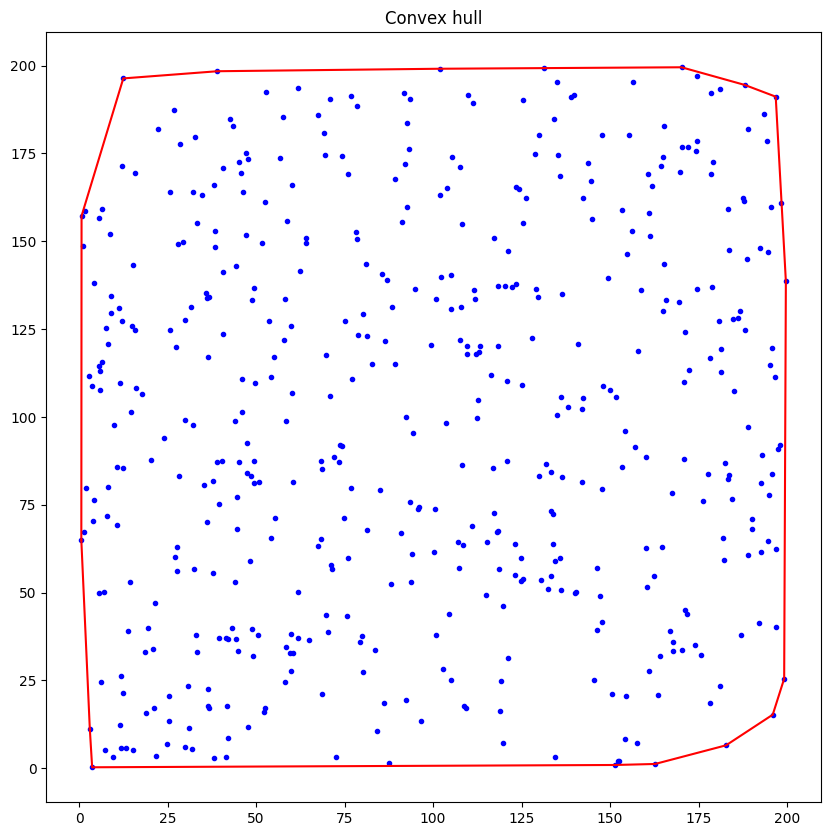

Giftwrapping:


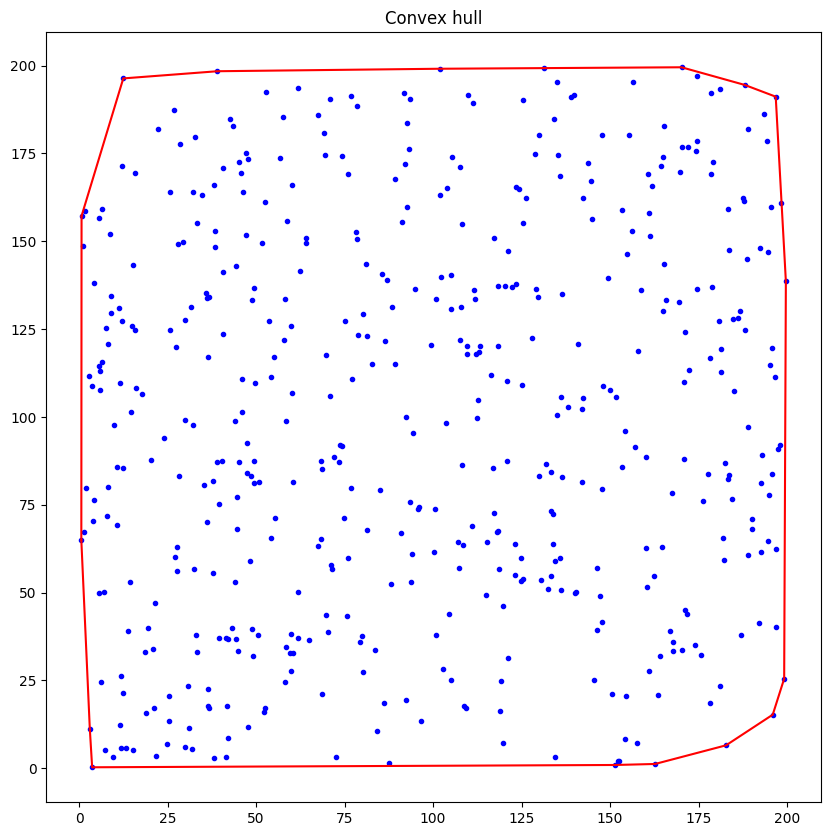

Divide and conquer:


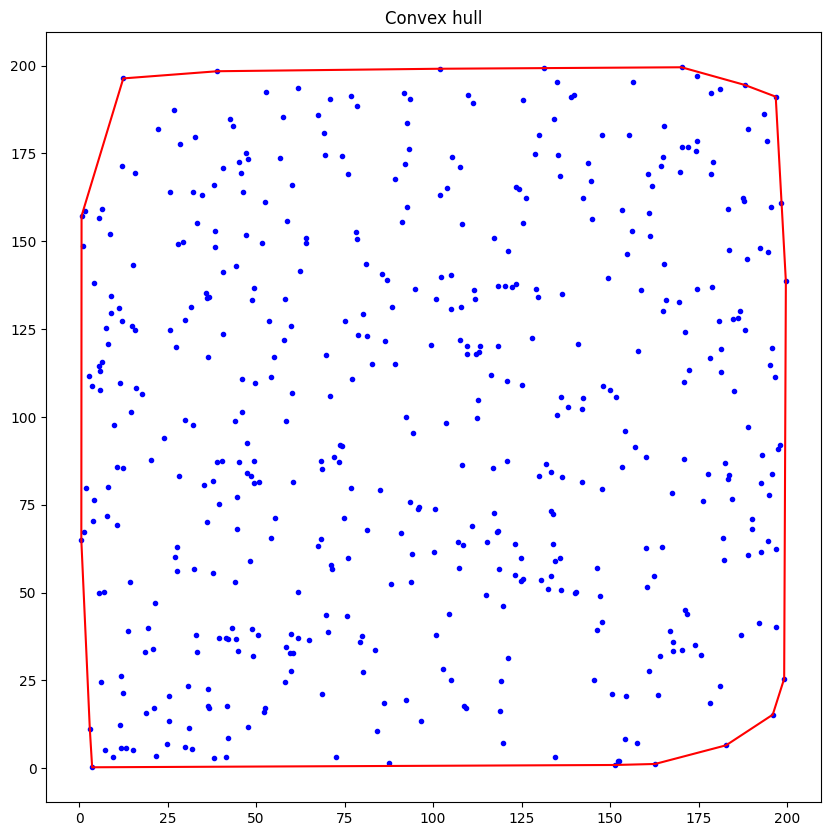

Quickhull:


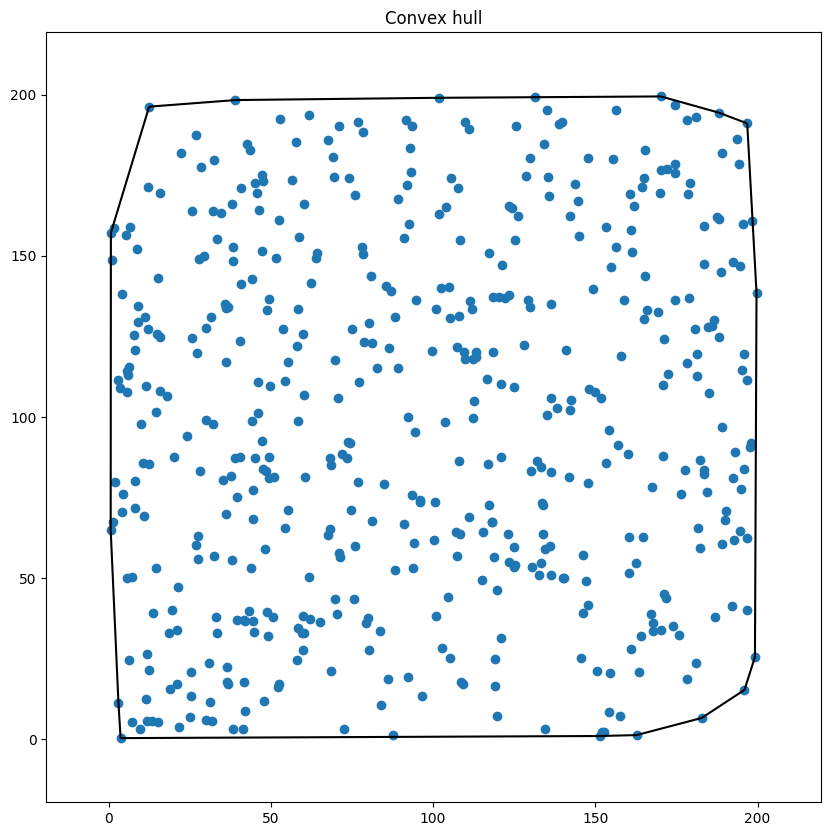

In [ ]:
print('Points of incremental\'s convex hull')
print(inc1)
print('Total number:',len(inc1))
print('Points of giftwrapping convex hull')
print(gw1)
print('Total number:',len(gw1))
print('Points of divide and conquer convex hull')
print(np.array(dc1))        
print('Total number:',len(dc1))
print('Points of quickhull\'s convex hull')
print(Pqhar1[qh1.vertices])
print('Total number:',len(qh1.simplices))

print("Incremental:")
plot2D(Pincar1,inc1)
print("Giftwrapping:")
plot2D(Pgwar1,gw1)
print("Divide and conquer:")
plot2D(Pdcar1,np.array(dc1))
print("Quickhull:")
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(qh1,ax)
plt.title("Convex hull")
plt.show()

1000 σημεία:

Points of incremental's convex hull
[[1.30306693e-01 1.52484324e+02]
 [3.58105171e-01 1.83198445e+02]
 [1.21926282e+01 1.98408111e+02]
 [3.84779351e+01 1.99652201e+02]
 [7.75328036e+01 1.99955542e+02]
 [1.62362785e+02 1.99881493e+02]
 [1.82726580e+02 1.99342390e+02]
 [1.97604673e+02 1.98253192e+02]
 [1.99789161e+02 1.94881017e+02]
 [1.99880906e+02 1.51900381e+02]
 [1.99036963e+02 2.52784651e+01]
 [1.94778333e+02 1.12657222e+01]
 [1.90337845e+02 6.46894868e+00]
 [1.66530189e+02 2.13206802e+00]
 [1.61241515e+02 1.18081790e+00]
 [1.11109066e+02 4.46428644e-01]
 [1.73818696e+01 4.63457146e-01]
 [3.39878336e+00 5.94636495e+00]
 [3.15536775e+00 6.31843003e+00]
 [4.38388706e-01 2.08596999e+01]]
Total number: 20
Points of giftwrapping convex hull
[[1.30306693e-01 1.52484324e+02]
 [4.38388706e-01 2.08596999e+01]
 [3.15536775e+00 6.31843003e+00]
 [3.39878336e+00 5.94636495e+00]
 [1.73818696e+01 4.63457146e-01]
 [1.11109066e+02 4.46428644e-01]
 [1.61241515e+02 1.18081790e+00]
 [1.66530189e+02 2.1

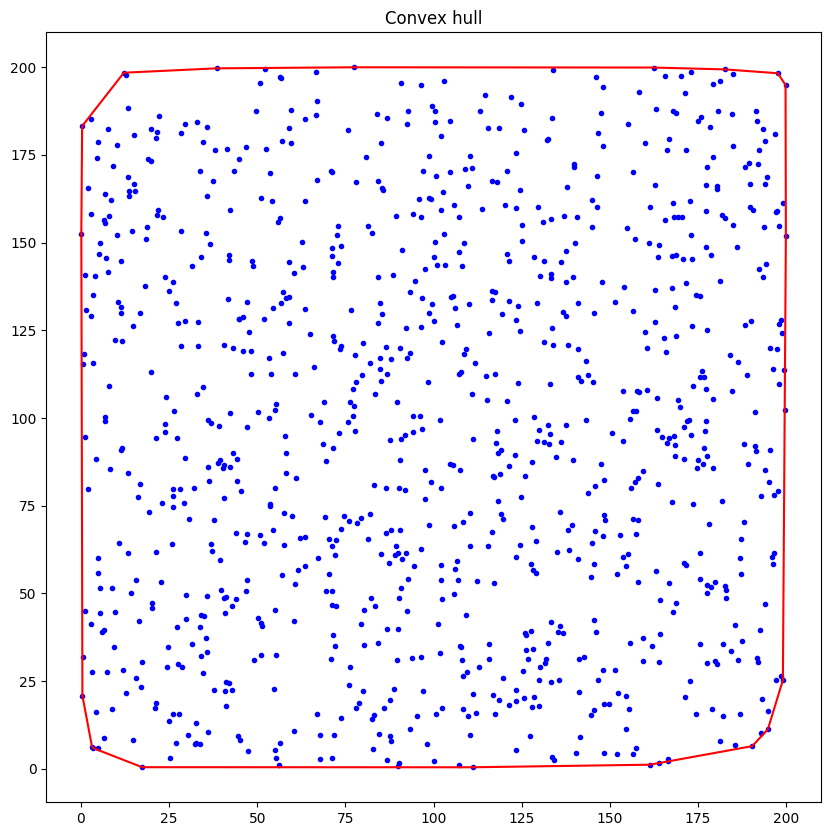

Giftwrapping:


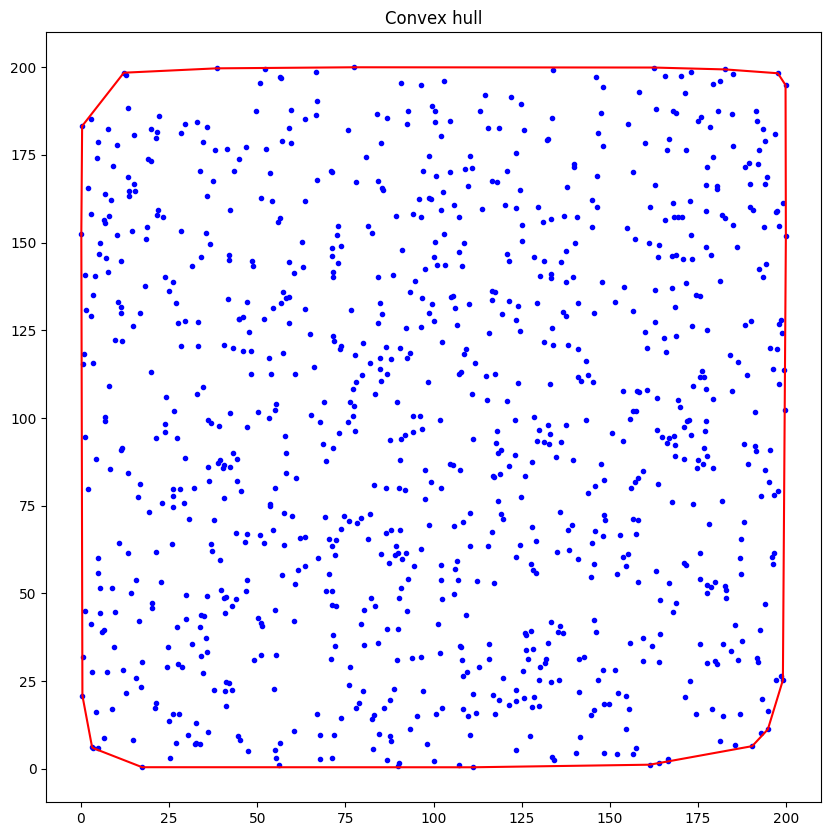

Divide and conquer:


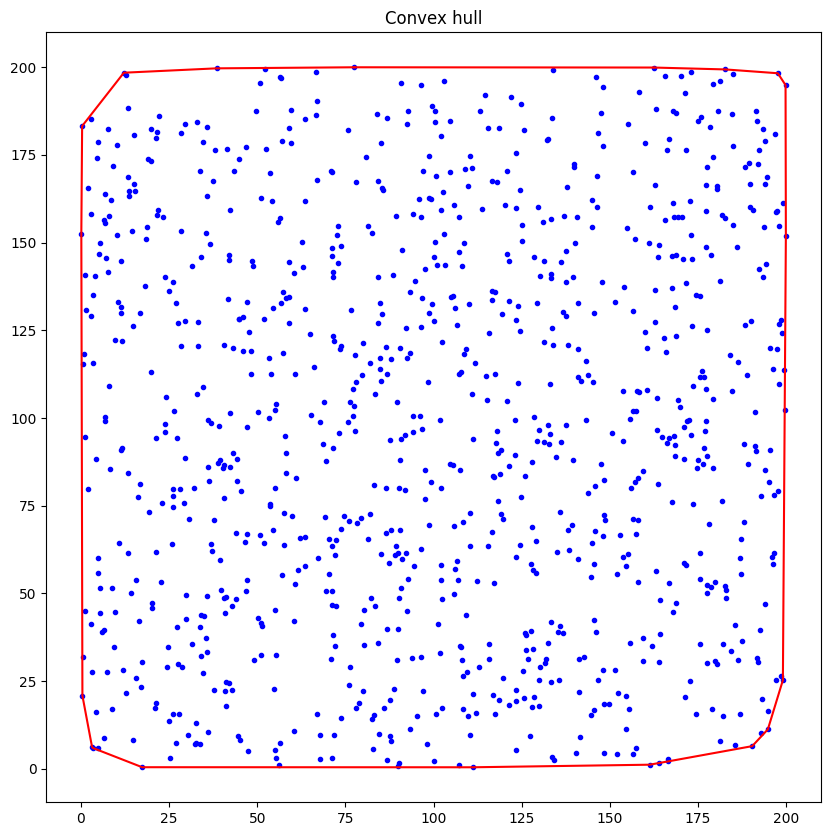

Quickhull:


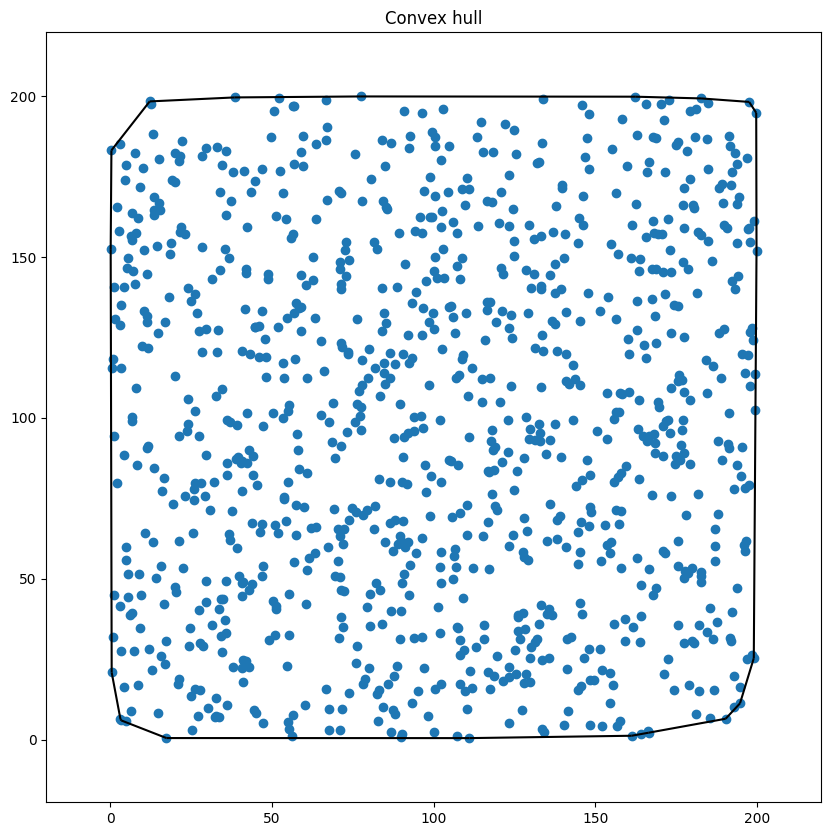

In [ ]:
print('Points of incremental\'s convex hull')
print(inc2)
print('Total number:',len(inc2))
print('Points of giftwrapping convex hull')
print(gw2)
print('Total number:',len(gw2))
print('Points of divide and conquer convex hull')
print(np.array(dc2))        
print('Total number:',len(dc2))
print('Points of quickhull\'s convex hull')
print(Pqhar2[qh2.vertices])
print('Total number:',len(qh2.simplices))

print("Incremental:")
plot2D(Pincar2,inc2)
print("Giftwrapping:")
plot2D(Pgwar2,gw2)
print("Divide and conquer:")
plot2D(Pdcar2,np.array(dc2))
print("Quickhull:")
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(qh2,ax)
plt.title("Convex hull")
plt.show()

10000 σημεία:

Points of incremental's convex hull
[[6.97719735e-03 4.69129910e+01]
 [2.93119019e-02 6.51903198e+01]
 [2.43970134e-01 1.82864786e+02]
 [2.59968538e-01 1.84846236e+02]
 [9.06759023e-01 1.99994326e+02]
 [1.08976394e+02 1.99949648e+02]
 [1.89526850e+02 1.99818358e+02]
 [1.97913681e+02 1.99193118e+02]
 [1.99244155e+02 1.95846416e+02]
 [1.99622343e+02 1.91956657e+02]
 [1.99731772e+02 1.85339337e+02]
 [1.99977951e+02 1.63195526e+02]
 [1.99995076e+02 1.43230449e+02]
 [1.99953139e+02 2.95173539e+01]
 [1.99679239e+02 2.58402084e+00]
 [1.98517974e+02 1.41567570e+00]
 [1.92939254e+02 5.11149195e-01]
 [1.52222544e+02 2.95091738e-03]
 [7.84636859e+01 5.90530680e-03]
 [1.85974055e+01 2.78301697e-02]
 [9.07636648e+00 4.17785014e-02]
 [7.44735429e-01 4.50929224e-01]
 [4.24746217e-01 1.48395619e+00]
 [1.50249694e-01 2.55978327e+00]]
Total number: 24
Points of giftwrapping convex hull
[[6.97719735e-03 4.69129910e+01]
 [1.50249694e-01 2.55978327e+00]
 [4.24746217e-01 1.48395619e+00]
 [7.44735429e-01 4.5

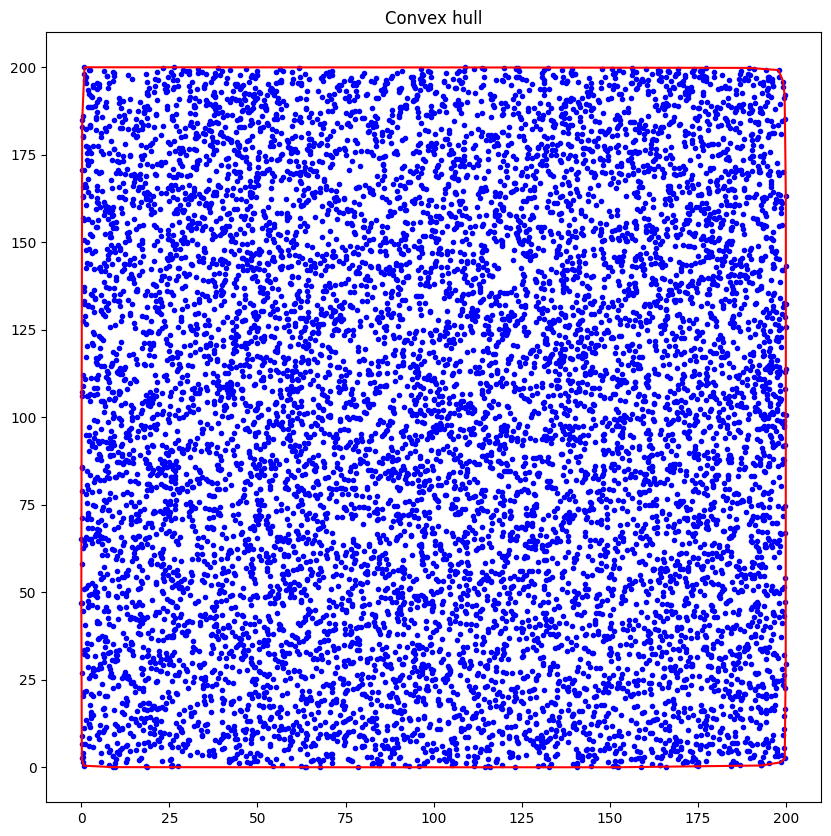

Giftwrapping:


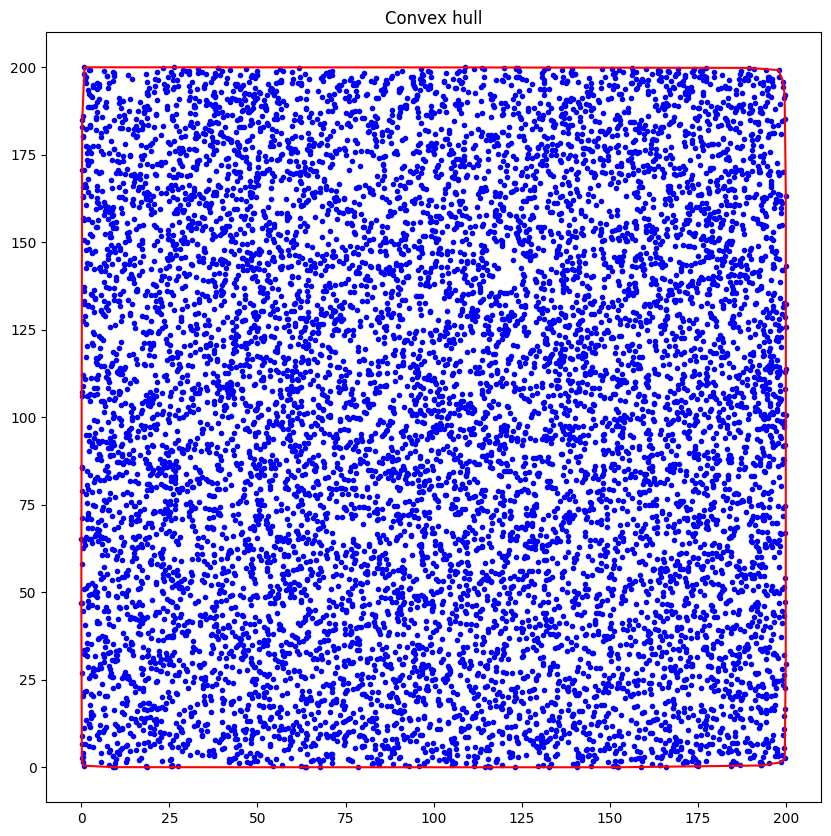

Divide and conquer:


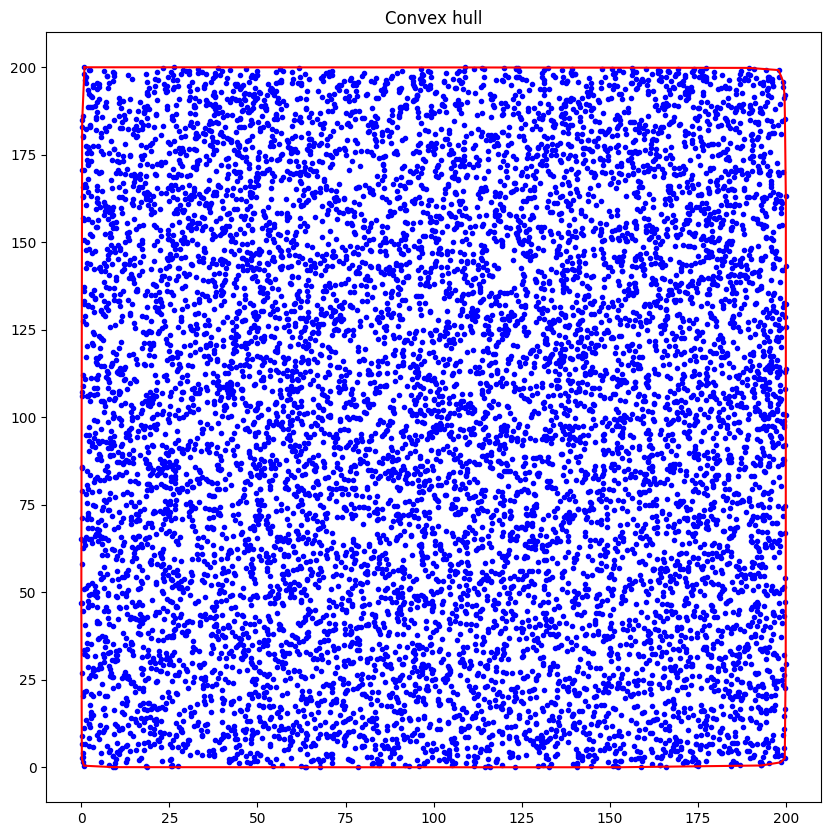

Quickhull:


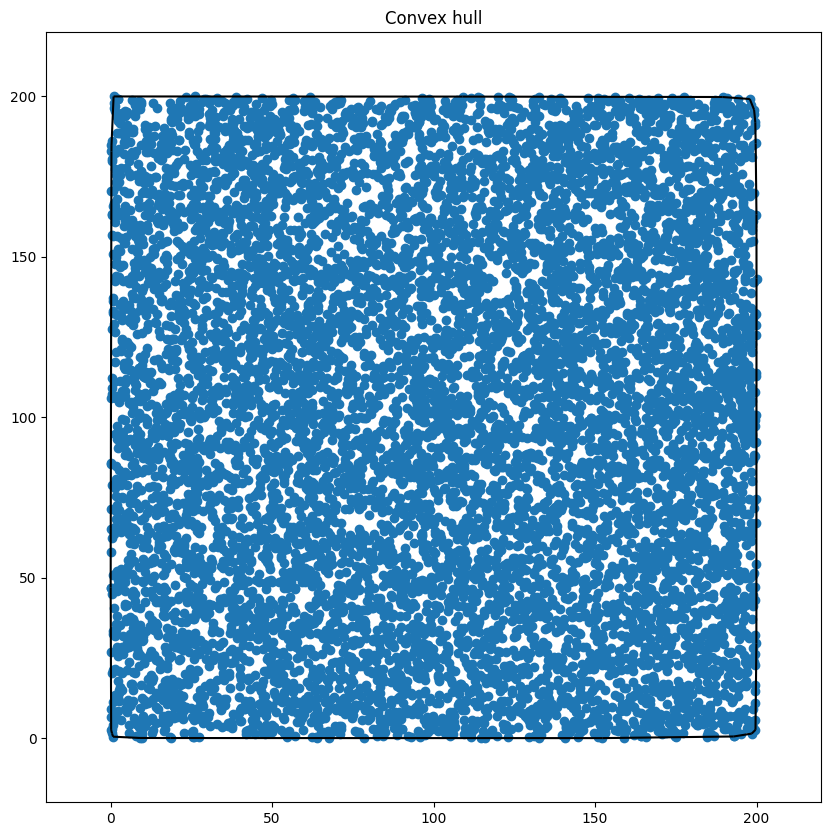

In [ ]:
print('Points of incremental\'s convex hull')
print(inc3)
print('Total number:',len(inc3))
print('Points of giftwrapping convex hull')
print(gw3)
print('Total number:',len(gw3))
print('Points of divide and conquer convex hull')
print(np.array(dc3))        
print('Total number:',len(dc3))
print('Points of quickhull\'s convex hull')
print(Pqhar3[qh3.vertices])
print('Total number:',len(qh3.simplices))


print("Incremental:")
plot2D(Pincar3,inc3)
print("Giftwrapping:")
plot2D(Pgwar3,gw3)
print("Divide and conquer:")
plot2D(Pdcar3,np.array(dc3))
print("Quickhull:")
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(qh3,ax)
plt.title("Convex hull")
plt.show()

100.000 σημεία:

Points of incremental's convex hull
[[2.82848138e-04 1.02439712e+02]
 [1.62283690e-02 1.90286736e+02]
 [1.21581146e-01 1.96756972e+02]
 [1.48952203e-01 1.98124180e+02]
 [6.64478498e-01 1.99366968e+02]
 [1.17323892e+00 1.99828802e+02]
 [1.35831931e+00 1.99928434e+02]
 [4.04608039e+00 1.99956776e+02]
 [1.28755184e+01 1.99997161e+02]
 [1.90962464e+02 1.99996571e+02]
 [1.98293166e+02 1.99959502e+02]
 [1.99560071e+02 1.97948896e+02]
 [1.99577812e+02 1.97869695e+02]
 [1.99962095e+02 1.93855712e+02]
 [1.99987602e+02 1.78930046e+02]
 [1.99999389e+02 1.55715413e+02]
 [1.99998536e+02 1.01142229e+02]
 [1.99994764e+02 2.72874726e+01]
 [1.99990168e+02 1.72428662e+01]
 [1.99971662e+02 5.02897802e+00]
 [1.99913132e+02 4.94122544e-01]
 [1.99769460e+02 1.73830313e-01]
 [1.98719188e+02 1.04238096e-01]
 [1.92366000e+02 1.87298956e-02]
 [1.75173247e+02 1.34580277e-02]
 [1.11984946e+02 1.73596261e-03]
 [1.79797633e+01 1.64498582e-02]
 [5.14302029e+00 6.51162711e-02]
 [1.01798748e+00 9.33400475e-02]
 [3.270

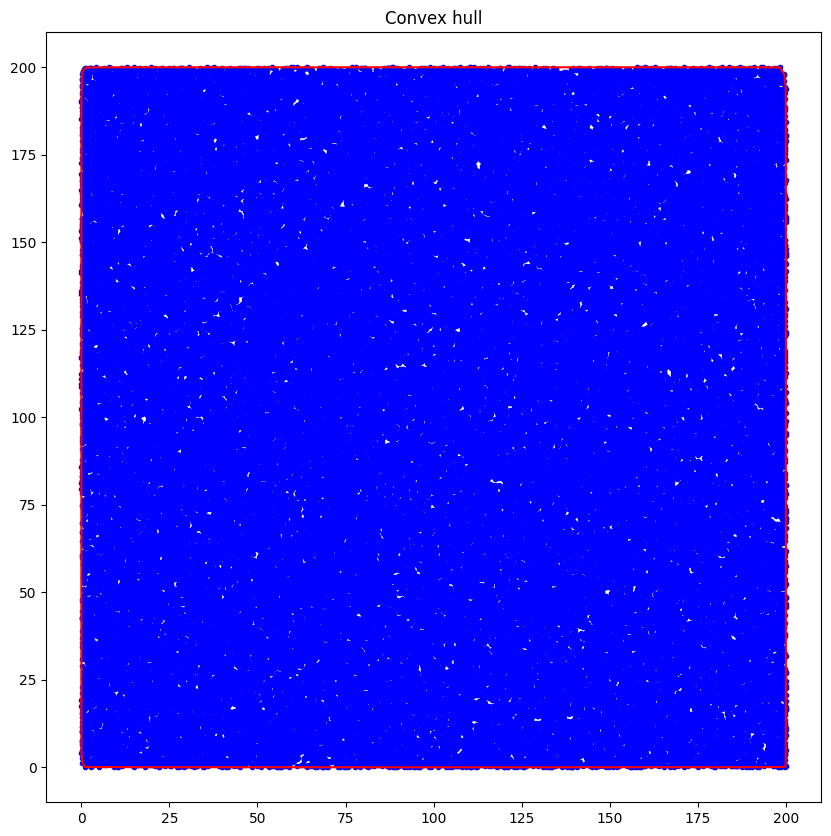

Giftwrapping:


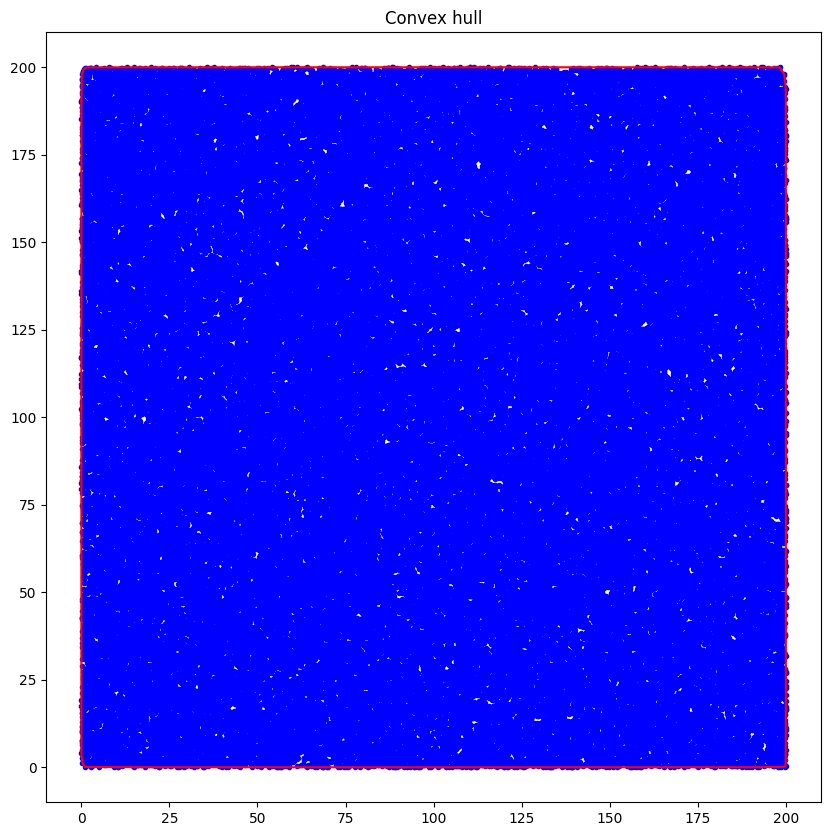

Divide and conquer:


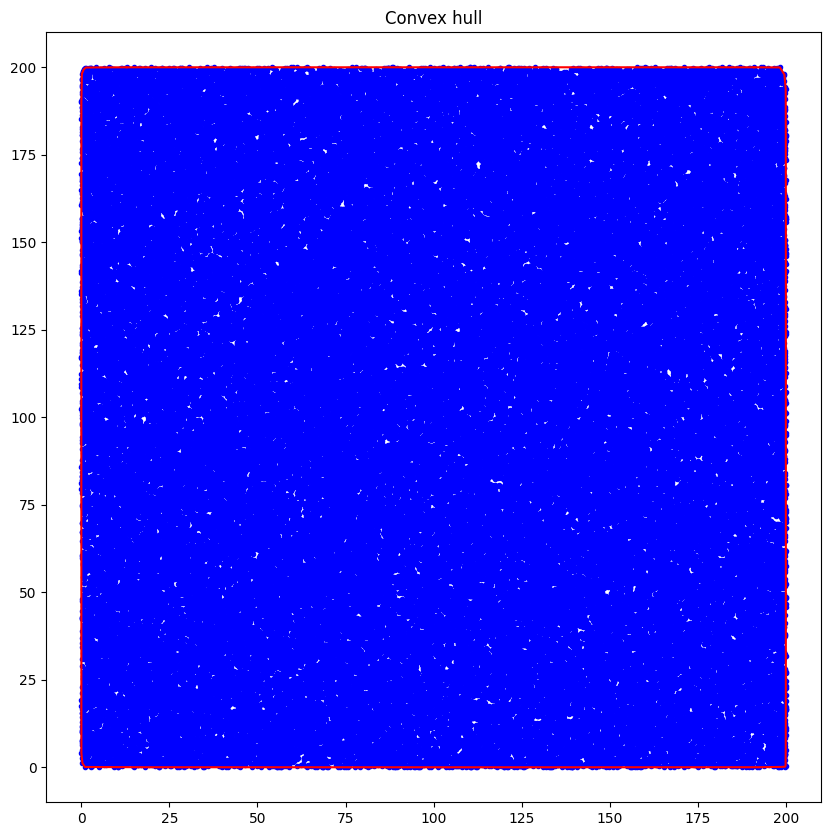

Quickhull:


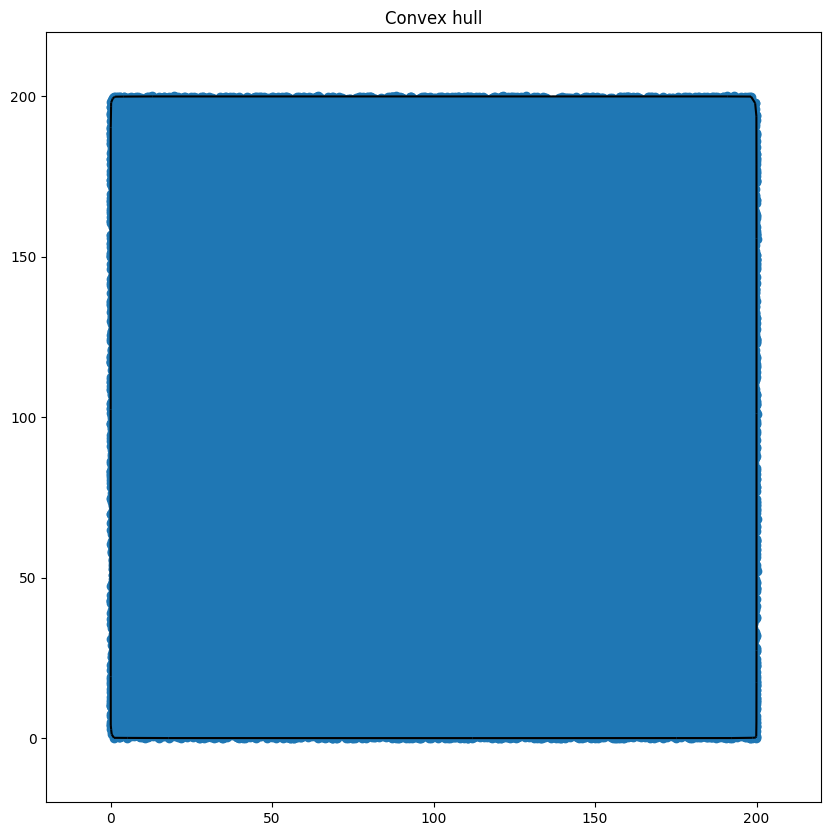

In [ ]:
print('Points of incremental\'s convex hull')
print(inc4)
print('Total number:',len(inc4))
print('Points of giftwrapping convex hull')
print(gw4)
print('Total number:',len(gw4))
print('Points of divide and conquer convex hull')
print(np.array(dc4))        
print('Total number:',len(dc4))
print('Points of quickhull\'s convex hull')
print(Pqhar4[qh4.vertices])
print('Total number:',len(qh4.simplices))

print("Incremental:")
plot2D(Pincar4,inc4)
print("Giftwrapping:")
plot2D(Pgwar4,gw4)
print("Divide and conquer:")
plot2D(Pdcar4,np.array(dc4))
print("Quickhull:")
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(qh4,ax)
plt.title("Convex hull")
plt.show()

3) Θεωρούμε 50 τυχαία σημεία στις 3 διαστάσεις:

In [ ]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(50)]
Par = np.array(P)
print("List of points:")
print(Par)

List of points:
[[ 86.56840356 149.17344021  28.51883672]
 [ 96.04901671 128.70117405  32.56890564]
 [162.00750971  26.55062976 108.7219424 ]
 [ 69.1906072   40.64212775 109.54048564]
 [118.71505613 125.49098237  78.28975864]
 [ 47.56783974  67.01249592  46.62664875]
 [ 78.8977454    2.94689961 127.66214978]
 [ 23.31456953 144.85697252 158.85844161]
 [182.23353899  64.43622388   5.77595214]
 [110.86130214  87.8634936  130.38684598]
 [ 62.56946933 132.52002191  50.59893683]
 [189.68865764 161.59320912  26.49693536]
 [ 95.85944084 185.28904297 101.82510476]
 [140.46190296  61.44445682  66.38464478]
 [ 51.31051793  86.44528945  30.36641623]
 [ 48.56408818  28.17658328 174.93776724]
 [ 29.2899955   72.94565107 146.31540688]
 [ 20.83599952 105.3053656   51.43224518]
 [170.48384983  36.25790377  12.9691489 ]
 [188.78894937  19.64928752 174.51394717]
 [161.31595956 173.48969698 133.77319702]
 [ 98.77597564 148.47651263 196.7755955 ]
 [ 52.26679829 161.03315326 131.87036196]
 [ 55.56771671  30

Αλγόριθμος Quickhull (3D).

Points of convex hull:
[[ 86.56840356 149.17344021  28.51883672]
 [ 47.56783974  67.01249592  46.62664875]
 [ 78.8977454    2.94689961 127.66214978]
 [182.23353899  64.43622388   5.77595214]
 [189.68865764 161.59320912  26.49693536]
 [ 95.85944084 185.28904297 101.82510476]
 [ 51.31051793  86.44528945  30.36641623]
 [ 48.56408818  28.17658328 174.93776724]
 [ 29.2899955   72.94565107 146.31540688]
 [ 20.83599952 105.3053656   51.43224518]
 [170.48384983  36.25790377  12.9691489 ]
 [188.78894937  19.64928752 174.51394717]
 [161.31595956 173.48969698 133.77319702]
 [ 98.77597564 148.47651263 196.7755955 ]
 [ 55.56771671  30.72151478 189.93742715]
 [193.3234489   66.78004631  90.37942091]
 [167.69158094   6.97355429  29.37525772]
 [170.10937572 187.10093407  12.18725739]
 [ 73.68598254 182.69649754  69.40450335]
 [ 12.52169471 182.14840268 199.17975395]
 [ 65.66965542  92.42202927  15.94442616]
 [198.57300114 100.76845641 123.17332498]
 [ 79.12340124 183.09430629  61.2396445 ]
 [ 45.08762

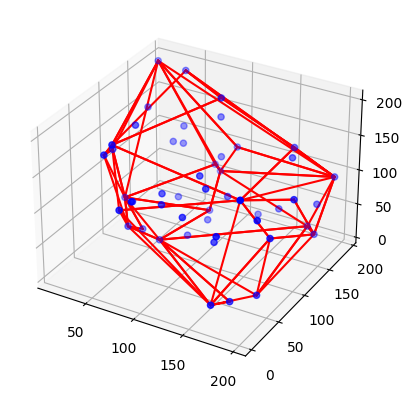

In [ ]:
from matplotlib import axis
def plot3D(Par,L):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  x = Par[:,0]
  y = Par[:,1]
  z = Par[:,2]
  ax.scatter(x,y,z,c='b')   
  for s in L.simplices:
      simplices = np.append(s, s[0])
      x = Par[s, 0]
      y = Par[s, 1]
      z = Par[s, 2]
      ax.plot(x,y,z,'r-')

  plt.show()

L = quickhull3d(P)
print("Points of convex hull:")
print(Par[L.vertices])
plot3D(Par,L)

#**Υλοποίηση 2: Γεωμετρική αναζήτηση.**


1) Διδιάστατη γεωμετρική αναζήτηση με χρήση kd tree.

In [ ]:
class Kdnode:             #class for a kdtree node 
  def __init__(self,v):
    self.v = v
    self.vleft = None
    self.vright = None

def createKd(P,depth=0):

  if (len(P) == 0):           
    return None

  if (len(P) == 1):
    return Kdnode(P[0])         #single leaf

  elif (len(P) > 1):

    if(depth % 2 == 0):             #even
      mode = "vertical"
      P.sort(key=lambda x: x[0])
    else:
      mode = "horizontal"                   #odd
      P.sort(key=lambda x: x[1])

    l = math.ceil(len(P)/2)
    node = Kdnode((P[l], mode))           #store line and mode
    node.vleft = createKd(P[:l],depth+1)
    node.vright = createKd(P[l:],depth+1)

    return node


def reportSubtree(root:Kdnode, leaves):

  if (root == None):
    return
  
  reportSubtree(root.vleft,leaves)

  if(root.vleft == None and root.vright == None):     #root is leaf
    leaves.append(root.v)

  reportSubtree(root.vright, leaves)
  

def searchKd(node: Kdnode, curR, R, leaves):

  if (node == None):
    return

  if (node.vleft == None and node.vright == None):   #root is leaf
    if (R[0][0] <= node.v[0] <= R[1][0] and R[0][1] <= node.v[1] <= R[1][1]):   #R contains leaf
      leaves.append(node.v)
    return

  leftregion, rightregion = None, None    #leftregion == downregion and rightregion = upregion when mode = horizontal
  if(node.v[1] == "vertical"):
    leftregion = ((curR[0][0],node.v[0][0]),(curR[1][0],curR[1][1]))     #set xmax
    rightregion = ((node.v[0][0],curR[0][1]),(curR[1][0],curR[1][1]))    #set xmin
  elif(node.v[1] == "horizontal"):
    leftregion = ((curR[0][0],curR[0][1]),(curR[1][0],node.v[0][1]))     #set ymax
    rightregion = ((curR[0][0],curR[0][1]),(node.v[0][1],curR[1][1]))    #set ymin

  if R[0][0] <= leftregion[0][0] and R[0][1] <= leftregion[1][0] and R[1][0] >= leftregion[0][1] and R[1][1] >= leftregion[1][1]: #R contains the whole left region
    reportSubtree(node.vleft,leaves)
  elif not(R[0][0] > leftregion[0][1] or R[1][0] < leftregion[0][0] or R[0][1] > leftregion[1][1] or R[1][1] < leftregion[1][0]):     #R intersects with left region
    searchKd(node.vleft, leftregion, R, leaves)

  if R[0][0] <= rightregion[0][0] and R[0][1] <= rightregion[1][0] and R[1][0] >= rightregion[0][1] and R[1][1] >= rightregion[1][1]: #R contains the whole right region
    reportSubtree(node.vright,leaves)
  elif not(R[0][0] > rightregion[0][1] or R[1][0] < rightregion[0][0] or R[0][1] > rightregion[1][1] or R[1][1] < rightregion[1][0]):     #R intersects with right region
    searchKd(node.vright, rightregion, R, leaves)
  

2)Ο αλγόριθμος με το kd δέντρο χωρίζεται σε 2 μέρη: \\
 * Tην κατασκευή του kd-tree, που είναι χρονικής πολυπλοκότητας O(nlogn). Το kd 
δέντρο με n σημεία καταλαμβάνει χώρο O(n), αφού έχουμε n διαφορετικά φύλλα, αλλά η χωρική πολυπλοκότητα κατασκευής του είναι O(nlogn), καθώς το δέντρο είναι δυαδικό και κάθε φύλλο και κόμβος χρησιμοποιεί χώρο O(1).

* Την διερεύνηση του kd-tree, που είναι χρονικής πολυπλοκότητας O($\sqrt{n}$+k) με k το πλήθος των αναφερόμενων σημείων.






#**Εφαρμογή 2:**

In [ ]:
def plotPointsRect(Par, R):
  plt.figure(figsize=(10,10))
  x = Par[:,0]        #x coordinate for P
  y = Par[:,1]        #y coordinate for P
  plt.plot(x,y,'.b')  #plot all the points
  xr = [R[0][0],R[0][0],R[1][0],R[1][0],R[0][0]]  #plot rectangle
  yr = [R[0][1],R[1][1], R[1][1], R[0][1], R[0][1]]
  plt.plot(xr,yr,'-r')
  plt.title('Points and rectangle')

P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(60)]
Par = np.array(P)
print("List of points:")
print(Par)

List of points:
[[ 92.58438598  52.15737102]
 [144.47183551  44.61736662]
 [191.26133886 186.34409542]
 [176.33509032  97.58912379]
 [ 42.90092426 179.194637  ]
 [183.91943513  88.01303585]
 [ 58.01579404 187.76560078]
 [ 48.25303321  34.96487825]
 [ 83.63559465 191.2080502 ]
 [ 41.10923298 114.57059212]
 [147.28036707  21.29477877]
 [124.48546379  72.97106592]
 [184.51858515   5.08125766]
 [182.43954837 122.54260034]
 [ 67.09009164 143.34002315]
 [137.82067077 167.41317159]
 [ 33.1964184  183.19369118]
 [ 60.01149815 157.40761962]
 [ 82.16607922  37.40909243]
 [122.66607176 176.09300683]
 [152.36570029 102.89948273]
 [ 48.18730228 159.9081462 ]
 [ 78.45757818   5.90845506]
 [130.87348576 150.84612378]
 [106.2144594  129.49913237]
 [ 32.41210943  58.62331055]
 [188.43988702  86.65635527]
 [ 65.09303193 128.96967037]
 [129.78376788 103.82322879]
 [109.20728613  97.71618537]
 [ 44.7503146   81.42021454]
 [122.28759588 110.76807696]
 [193.81286863  56.63701591]
 [195.18356052 104.64449902

Number of points into the rectangle:  13
Points into the rectangle [(48.25303321051053, 34.96487825019441), (32.41210942942401, 58.623310546253784), (77.27735862803509, 45.342659376338275), (44.750314600259266, 81.42021454383979), (82.16607922104822, 37.40909243201469), (92.58438597780454, 52.15737102018381), (109.2072861259599, 97.7161853738111), (125.02300762883765, 39.06414639793234), (144.4718355080158, 44.617366623268474), (147.28036707300336, 21.294778765707157), (124.48546378593237, 72.97106591590989), (131.77402817999726, 98.22615952656773), (136.4914525396645, 77.65357133541085)]


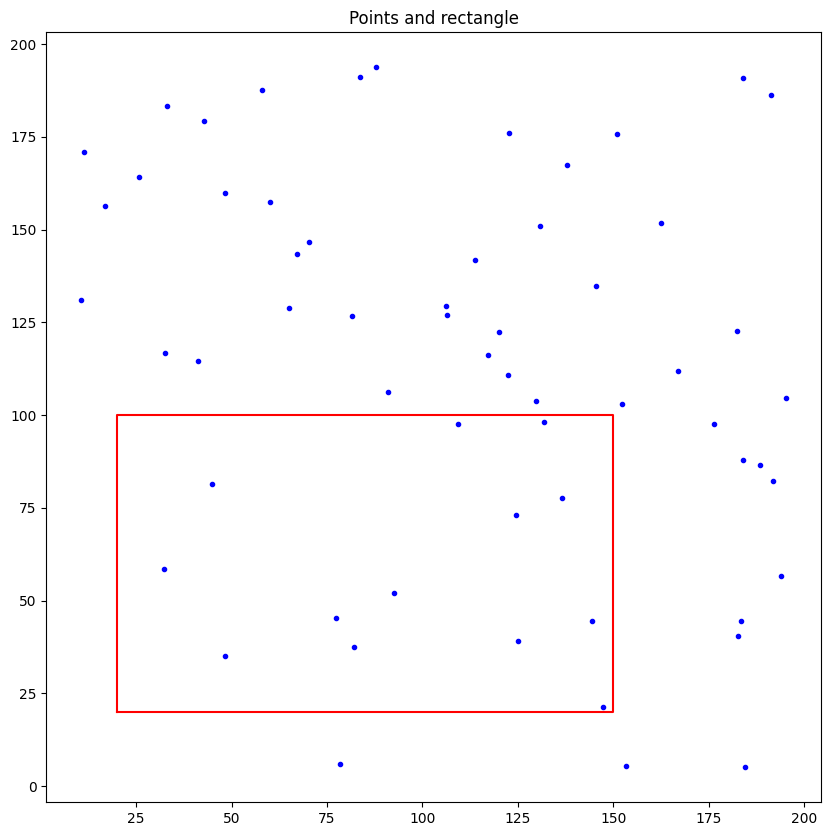

In [ ]:
root = createKd(P)
infreg = ((-float("inf"),float("inf")),(-float("inf"),float("inf")))  #((xleft,xright),(ydown,yup))
R = ((20.0,20.0),(150.0,100.0))   #((xmin,ymin),(xmax, ymax)) for rectangle
leaves = []
searchKd(root, infreg, R, leaves)
print('Number of points into the rectangle: ', len(leaves))
print('Points into the rectangle', leaves) #points into the rectangle
plotPointsRect(Par, R)

#**Εφαρμογή 3: Διάγραμμα Voronoi - Τριγωνοποίηση Delaunay.**

1)

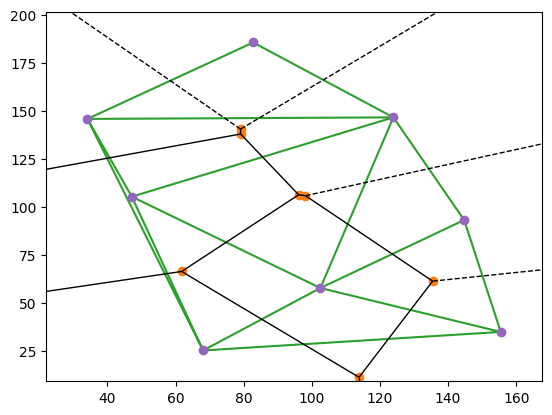

In [37]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt

N = 8
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(N)]
Par = np.array(P)

#voronoi
v = Voronoi(P)
vplot = voronoi_plot_2d(v)

#delaunay
d = Delaunay(P)
plt.triplot(Par[:,0],Par[:,1],d.simplices)
plt.plot(Par[:,0],Par[:,1],'o')
plt.show()

2) Πολυπλοκότητα αλγορίθμων: Η πολυπλοκότητα των 2 αλγορίθμων είναι πολυωνυμική O(nlogn). Γνωρίζουμε και παρατηρούμε από την απεικόνιση ότι το διάγραμμα Delaunay αποτελεί τον δυϊκό γράφο του Voronoi, κάτι που έχει άμεση σχέση με την πολυπλοκότητα και με τον χρόνο εκτέλεσης των αλγορίθμων (είναι δηλαδή παρόμοια). Σε οποιοδήποτε πλήθος σημείων εισόδου, οι 2 αλγόριθμοι εκτελούνται στον ίδιο περίπου χρόνο, με τον Delaunay να εκτελείται λίγο πιο γρήγορα. Επιπλέον, το πλήθος των σημείων επηρεάζει τον χρόνο εκτέλεσης των αλγορίθμων ειδικά σε μεγάλα πλήθη, όπου ο χρόνος εκτέλεσης αυξάνεται περίπου γραμμικά. Για παράδειγμα, εαν 10πλασιάσουμε των αριθμό των σημείων (από 100.000 σε 1.000.000), ο χρόνος εκτέλεσης 10πλασιάζεται (από 1 sec σε 10 sec περίπου).   